<a href="https://colab.research.google.com/github/Purohit1999/Data_Science/blob/main/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

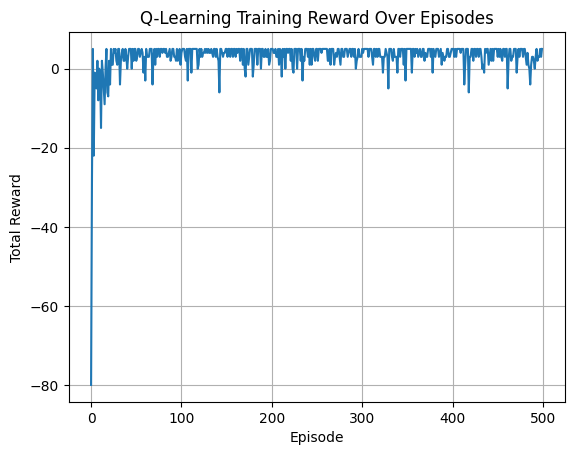

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the environment
grid_size = 4
actions = ['up', 'down', 'left', 'right']
action_dict = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}  # U, D, L, R

# Q-table: rows * cols * actions
Q = np.zeros((grid_size, grid_size, len(actions)))

# Hyperparameters
alpha = 0.1        # learning rate
gamma = 0.9        # discount factor
epsilon = 0.2      # exploration rate
episodes = 500

# Goal position
goal_state = (3, 3)

# Rewards
def get_reward(state):
    return 10 if state == goal_state else -1

# Valid move
def is_valid(state):
    return 0 <= state[0] < grid_size and 0 <= state[1] < grid_size

# Choose action using ε-greedy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, 3)
    else:
        return np.argmax(Q[state[0], state[1]])

# Training the agent
rewards_per_episode = []

for ep in range(episodes):
    state = (0, 0)
    total_reward = 0

    while state != goal_state:
        action = choose_action(state)
        move = action_dict[action]
        next_state = (state[0] + move[0], state[1] + move[1])

        if not is_valid(next_state):
            next_state = state  # stay in same place if move invalid

        reward = get_reward(next_state)
        total_reward += reward

        # Q-learning update
        old_value = Q[state[0], state[1], action]
        next_max = np.max(Q[next_state[0], next_state[1]])

        Q[state[0], state[1], action] = old_value + alpha * (reward + gamma * next_max - old_value)
        state = next_state

    rewards_per_episode.append(total_reward)

# Plotting rewards
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Training Reward Over Episodes')
plt.grid(True)
plt.show()


* **X-axis**: Number of episodes (training iterations)
* **Y-axis**: Total reward received per episode

---

### 🔍 What This Graph Shows:

1. **Early Episodes (0–50)**:

   * The total reward is highly **negative** and **erratic**.
   * This means the agent is exploring and taking inefficient paths (many wrong steps), leading to a low cumulative reward (penalties from each step).

2. **Middle Episodes (50–200)**:

   * The reward **increases and stabilizes**, indicating the agent is **learning** better policies by updating its Q-table.
   * Fewer steps to goal → fewer penalties → higher total reward.

3. **Later Episodes (200–500)**:

   * The reward consistently stays **close to the maximum (\~10)**.
   * Occasional dips are due to **ε-greedy exploration** (epsilon is still 0.2, so 20% of the time, it still takes random actions).

---

### ✅ Interpretation:

* **Learning success**: The agent has learned a good policy to reach the goal efficiently.
* **Exploration noise**: Occasional negative spikes are due to random exploration (important for learning but can reduce performance temporarily).
* **Overall trend**: Steady improvement and convergence towards optimal policy.

---

### 📈 Summary:

The graph means your Q-learning agent is:

* Initially learning by trial and error,
* Then progressively improving its decisions,
* And finally performing reliably with optimal/near-optimal actions most of the time.